<a href="https://colab.research.google.com/github/GabeGD/Bootcamp_Geracao_Tech_Unimed_BH_Ciencia_de_Dados/blob/main/projetoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio De Projeto DIO
##Projeto de Análise Exploratória de Dados e Machine Learning
###Covid-19

Este trabalho, exercício para Desafio de Projeto de Bootcamp da DIO, replica com algumas modificações o projeto base apresentado em aula. Visa apresentar uma análise exploratória de dados de contaminação com Covid-19, como casos confirmados, mortes e "recuperados" ao longo do tempo. Além disso, os dados também são utilizados para realizar análises preditivas, usando, para isso, ferramentas de Machine Learning, como os pacotes ARIMA e Facebook Prophet. 

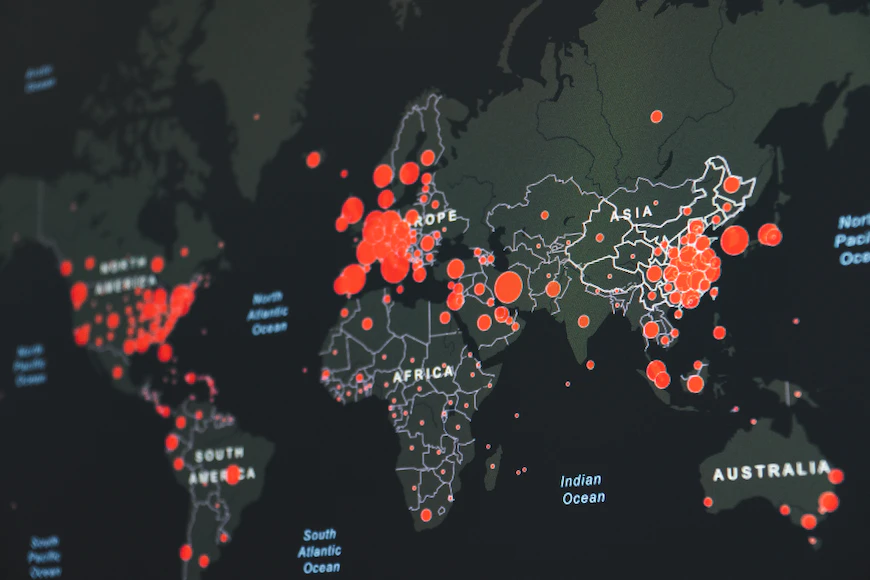

imagem ilustrativa

fonte:Unsplash

##Importando pacotes

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime 
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings 
warnings.filterwarnings('ignore')

##Importando e lendo dados

In [6]:
url='https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [7]:
df=pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [8]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

##Padronizando títulos das colunas

In [9]:
def corrige_colunas(col_name):
    return re.sub(r'[/| ]','',col_name).lower() 

In [10]:
corrige_colunas("AbC/ De")

'abcde'

In [11]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [12]:
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


##Selecionando região de interesse: Brasil

In [13]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [14]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed>0)]
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


##Plotando Gráficos

In [15]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

In [16]:
brasil['newcases']=list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x]-brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0]))
)

In [17]:
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,newcases
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0


In [18]:
px.line(brasil, x='observationdate',y='newcases', title='Novos casos por dia no Brasil')

Neste recorte temporal, o dia com o maior número de novos casos confirmados foi dia 17 de maio de 2020.

In [19]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes', 
               mode='lines+markers', line={'color':'purple'})
)
fig.update_layout(title='Mortes por Covid-19 no Brasil')
fig.show()

##Encontrando a taxa diária de crescimento de casos 

In [20]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
  if data_inicio == None:
     data_inicio = data.observationdate.loc[data[variable]>0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
  if data_fim == None:
    data_fim=data.observationdate.iloc[-1]
  else:
    data_fim=pd.to_datetime(data_fim)

  passado = data.loc[data.observationdate==data_inicio, variable].values[0]
  presente = data.loc[data.observationdate==data_fim, variable].values[0]

  n=(data_fim - data_inicio).days

  taxa=(presente/passado)**(1/n)-1
  return taxa*100
                                                                               

In [21]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

No período avaliado, a taxa de crescimento diário de novos casos foi de 16,27%.

In [22]:
def taxa_diaria_crescimento(data, variable, data_inicio=None):
 if data_inicio == None:
     data_inicio = data.observationdate.loc[data[variable]>0].min()
 else:
    data_inicio = pd.to_datetime(data_inicio)

 data_fim=data.observationdate.max()
 n=(data_fim - data_inicio).days

 taxas=list(map(
     lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) /data[variable].iloc[x-1],
     range(1, n+1)
 )) 
 return np.array(taxas)*100 

In [23]:
taxa_dia = taxa_diaria_crescimento(brasil,'confirmed')

In [24]:
primeiro_dia=brasil.observationdate.loc[brasil.confirmed>0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=taxa_dia, title='Taxa de crescimento diário de casos confirmados no Brasil') 

##Machine Learning

###Importando pacotes

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Decomposição sazonal usando médias móveis. Este pacote automatiza a decomposição da série temporal em quatro partes: observação(1ºgráfico), tendência(2º), sazonalidade(3º) e ruído(4º).

###Utilizando o pacote

In [25]:
confirmados=brasil.confirmed
confirmados.index=brasil.observationdate
confirmados.head()

observationdate
2020-02-26    1.0
2020-02-27    1.0
2020-02-28    1.0
2020-02-29    2.0
2020-03-01    2.0
Name: confirmed, dtype: float64

In [26]:
res=seasonal_decompose(confirmados)

<function matplotlib.pyplot.show(*args, **kw)>

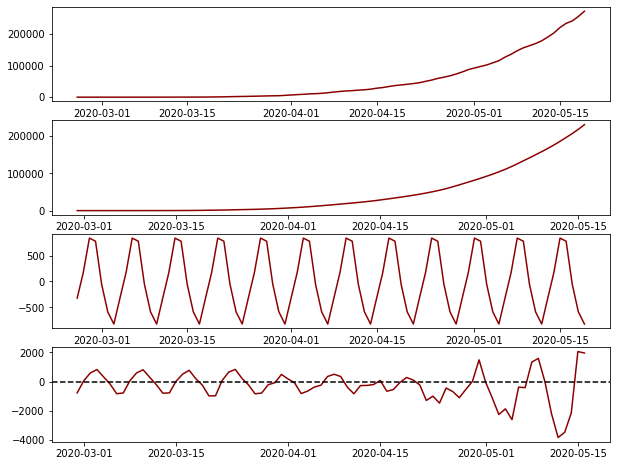

In [27]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,8))
ax1.plot(res.observed, color='darkred')
ax2.plot(res.trend, color='darkred')
ax3.plot(res.seasonal, color='darkred')
ax4.plot(confirmados.index, res.resid, color='darkred')
ax4.axhline(0, linestyle='dashed', c='black')
plt.show

Os gráficos reproduzem os dados, a tendência(crescimento de casos confirmados), a sazonalidade e o aumento do ruído nos últimos dias avaliados.

##ARIMA
(**A**uto**R**egressive **I**ntegrated **M**oving **A**verage)


O modelo utiliza dados passados da série temporal para prever valores futuros.¹

###Instalando ARIMA

In [ ]:
!pip install pmdarima

###Importando Pacote

In [28]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

###Gráfico de previsão

In [29]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))
fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(),name='Preditos'
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20','2020-06-04'), y=modelo.predict(31), name='previsão'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os 15 dias seguintes')
fig.show()

##Instalando Facebook Prophet

Segundo documentação do pacote, "O Prophet é um método para prever dados de séries temporais com base em um modelo aditivo em que as tendências não-lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos de feriados."² 

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

###Importando Pacotes

In [32]:
from fbprophet import Prophet

In [33]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

###Treinando o modelo e preparando a predição

In [34]:
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]
train.rename(columns={'observationdate':'ds','confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate':'ds','confirmed': 'y'}, inplace=True)
profeta=Prophet(growth='logistic', changepoints=['2020-03-21','2020-03-30','2020-04-25','2020-05-03'])
pop=2000000
train['cap']=pop

profeta.fit(train)

future_dates=profeta.make_future_dataframe(periods=40)
future_dates['cap']=pop
forecast=profeta.predict(future_dates)


###Gráfico preditivo

In [35]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds,y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Treino'))
fig.add_trace(go.Scatter(x=test.ds, y=test.y, name='Teste'))
fig.update_layout(title='Predição de casos confirmados no Brasil')
fig.show()

###Referências

¹https://doi.org/10.1590/1806-93042021000200016

²https://facebook.github.io/prophet/